Name : Rattanavilay, Thip<br>
Class : DSC530<br>
Week 8: Hypothesis Testing & Linear Least Squares<br>
Assignment : 8.2, 10-1<br>

**Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height?**

**Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. In the BRFSS data, the variable name for these weights is finalwt. Use resampling, with and without weights, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, and a 90% confidence interval. How much does correct weighting affect the estimates?**

In [1]:
import numpy as np
import random
import thinkstats2 
from thinkstats2 import Mean, Std
import thinkplot
import brfss

In [2]:
df = brfss.ReadBrfss(nrows=None)           # Read Brfss dataset
df = df.dropna(subset=['htm3', 'wtkg2'])   # Drop NaN
heights, weights = df.htm3, df.wtkg2
log_weights = np.log10(weights)            # Log of weight

# linear least squares fit for log(weight) versus height
inter, slope = thinkstats2.LeastSquares(heights, log_weights)
print(inter, slope)

0.9930804163918104 0.005281454169417819


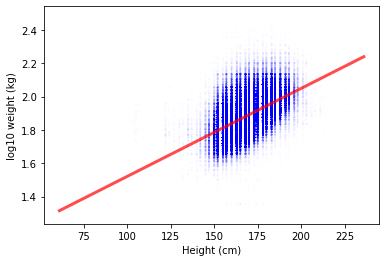

In [3]:
# Presentation of estimated parameters with one of the variables is log-transformed

thinkplot.Scatter(heights, log_weights, alpha=0.01, s=5)
fxs, fys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Plot(fxs, fys, color='red')
thinkplot.Config(xlabel='Height (cm)', ylabel='log10 weight (kg)', legend=False)

In [4]:
# function to takes a list of estimates and prints the mean, standard error, and 90% confidence interval.
def Summarize(estimates, actual=None):
    mean = Mean(estimates)
    stderr = Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

In [5]:
# Resample rows without weights, compute mean height, and summarize results.

estimates_unweighted = [thinkstats2.ResampleRows(df).htm3.mean() for _ in range(100)]
Summarize(estimates_unweighted)

mean, SE, CI 168.95524975242023 0.013817008906070481 (168.9335526182825, 168.98223488752805)


In [6]:
# Resample rows with weights(column - finalwt), compute mean height, and summarize results.

weights = df['finalwt']
cdf = thinkstats2.Cdf(dict(weights))
indices = cdf.Sample(len(weights))
sample = df.loc[indices]
    
estimates_weighted = [sample.htm3.mean() for _ in range(100)]
Summarize(estimates_weighted)

mean, SE, CI 170.50676297014888 5.684341886080802e-14 (170.50676297014894, 170.50676297014894)


**By including weight in resampling the, estimated mean height increases by 2 cm.**